In [1]:
# dot product of keyword comparison (lightly weighted)

### Installation script
```
conda create -n ner python=3.6
source activate ner
conda install -c conda-forge spacy -y
conda install ipython jupyter nb_conda nltk numpy matplotlib -y
conda install -c conda-forge rake_nltk -y
python -m spacy download en
python -m spacy download en_core_web_sm
python -m spacy download en_core_web_lg
```

# Testing sample code

rake_nltk keywords

In [17]:
from rake_nltk import Rake

# Uses stopwords for english from NLTK, and all puntuation characters by
# default
r = Rake()

# Extraction given the text.
r.extract_keywords_from_text("In August 2018, adhesive replicas of President Donald Trump's recently-destroyed star were placed on the Walk of Fame on Hollywood Boulevard.")

# # Extraction given the list of strings where each string is a sentence.
# r.extract_keywords_from_sentences(<list of sentences>)

# To get keyword phrases ranked highest to lowest.
print(r.get_ranked_phrases())

# To get keyword phrases ranked highest to lowest with scores.
print(r.get_ranked_phrases_with_scores())

['president donald trump', 'hollywood boulevard', 'destroyed star', 'august 2018', 'adhesive replicas', 'walk', 'recently', 'placed', 'fame']
[(9.0, 'president donald trump'), (4.0, 'hollywood boulevard'), (4.0, 'destroyed star'), (4.0, 'august 2018'), (4.0, 'adhesive replicas'), (1.0, 'walk'), (1.0, 'recently'), (1.0, 'placed'), (1.0, 'fame')]


In [18]:
r1 = Rake()
r1.extract_keywords_from_text("In August 2018, adhesive replicas of President Donald Trump's recently-destroyed star were placed on the Walk of Fame on Hollywood Boulevard.")
r1_scored = r1.get_ranked_phrases_with_scores()

In [19]:
r2 = Rake()
r2.extract_keywords_from_text("Someone pasted stars for Donald Trump.")
r2_scored = r2.get_ranked_phrases_with_scores()

spaCy vectors

dog True 7.0336733 False
(300,)
cat True 6.6808186 False
(300,)
banana True 6.700014 False
(300,)
Obama True 7.414071 False
(300,)


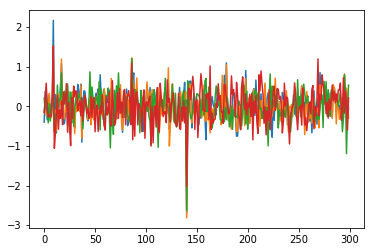

In [20]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_lg')
tokens = nlp(u'dog cat banana Obama')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
    print(np.shape(token.vector))
    plt.plot(token.vector)

# Comparing phrases with max-min pooled word vectors

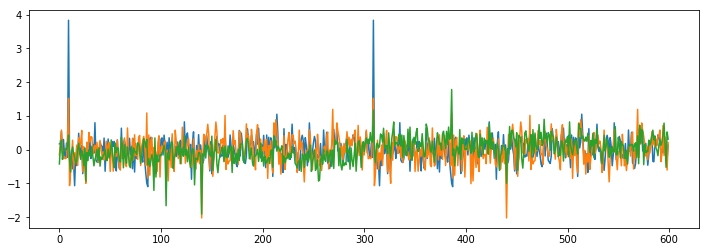

In [24]:
import numpy as np

plt.figure(figsize=(12,4))

# tokens1 = nlp(u'President')
# tokens2 = nlp(u'Obama')
# tokens3 = nlp(u'Trump Jr')

def phrase_vect(text):
    tokens = nlp(text)
    maxpool = np.maximum.reduce([token.vector for token in tokens])
    minpool = np.minimum.reduce([token.vector for token in tokens])
    result = np.concatenate((minpool,maxpool))
    plt.plot(result)
    return result

# def phrase_vect(tokens):
#     maxpool = np.maximum.reduce([token.vector for token in tokens])
#     minpool = np.minimum.reduce([token.vector for token in tokens])
#     result = np.concatenate((minpool,maxpool))
#     plt.plot(result)
#     return result
    
vector1 = phrase_vect(u'President')
vector2 = phrase_vect(u'Obama')
vector3 = phrase_vect(u'Trump Jr')

In [25]:
def cosine(u,v):
#     print(np.shape(u))
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [23]:
cosine(vector1,vector2)

0.4542843

In [11]:
# ok building a color plot instead

In [12]:
phrase_list = [
    "President of the United States",
    "POTUS",
    "President",
    "President Obama",
    "Barack Obama",
    "Obama",
    "Osama",
    "President Clinton",
    "Bill Clinton",
    "Clinton",
    "Hillary Clinton",
    "Hillary",
    "Trump",
    "Trump Jr",
    "Donald Trump",
    "President Trump",
    "Ice Cream",
    "Lee Kuan Yew",
    "Python",
    "Singapore"
]

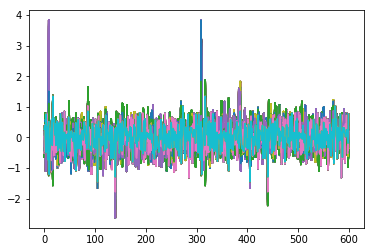

In [13]:
def meshgrid(x,y): # DW code !!!
    return (
        [[x_ for x_ in x] for  _ in y],
        [[y_ for  _ in x] for y_ in y])

pair_mesh = meshgrid(phrase_list, phrase_list)
value_mesh = meshgrid([0]*len(phrase_list), [0]*len(phrase_list))

import numpy as np
for i,_ in enumerate(pair_mesh[0]):
    for j,_ in enumerate(pair_mesh[0][0]): 
        phrase1 = pair_mesh[0][i][j]
        phrase2 = pair_mesh[1][i][j]
        
#         tokens1 = nlp(phrase1)
#         tokens2 = nlp(phrase2)
        
        vector1 = phrase_vect(phrase1)
        vector2 = phrase_vect(phrase2)
        
        value_mesh[0][i][j] = cosine(vector1, vector2)

In [ ]:
import matplotlib.pyplot as plt
print(np.shape(value_mesh[0]))
# fig, ax = plt.subplots(1,1)

# ax.imshow(value_mesh[0])
plt.figure(figsize=(12,12))
plt.imshow(np.transpose(value_mesh[0]), cmap='gray_r')
plt.clim(0.5,1)
plt.yticks(np.arange(len(phrase_list)), phrase_list)
plt.xticks(np.arange(len(phrase_list)), phrase_list, rotation='vertical')
plt.colorbar()
plt.show()

## Comparing claim with text


In [ ]:
claim = "Obama is born in Kenya."
text = "Kenya born Obama is taking our guns away."

In [ ]:
r1 = Rake()
r1.extract_keywords_from_text(claim)
r1_scored = r1.get_ranked_phrases_with_scores()
print(r1_scored)

r2 = Rake()
r2.extract_keywords_from_text(text)
r2_scored = r2.get_ranked_phrases_with_scores()
print(r2_scored)

In [ ]:
# assign vectors
for keyword in r1_scored:
#     keyword
    pass